# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('datasets_180_408_data.csv')

In [3]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset.groupby('diagnosis').describe()

id                                                          \
           count          mean           std     min       25%       50%   
diagnosis                                                                  
B          357.0  2.654382e+07  1.167397e+08  8913.0  874662.0  908916.0   
M          212.0  3.681805e+07  1.378965e+08  8670.0  861345.0  895366.5   

                                   radius_mean             ...  \
                  75%          max       count       mean  ...   
diagnosis                                                  ...   
B          8812816.00  911320502.0       357.0  12.146524  ...   
M          8911289.75  911296202.0       212.0  17.462830  ...   

          fractal_dimension_worst         Unnamed: 32                       \
                              75%     max       count mean std min 25% 50%   
diagnosis                                                                    
B                        0.085410  0.1486         0.0  NaN NaN NaN NaN NaN   
M                        0.102625  0.2075         0.0  NaN NaN NaN NaN NaN   

                   
          75% max  
diagnosis          
B         NaN NaN  
M         NaN NaN  

[2 rows x 256 columns]

In [6]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [7]:
#sns.distplot(a=None, bins=None, hist=True, kde=True, x=None)

<AxesSubplot:>

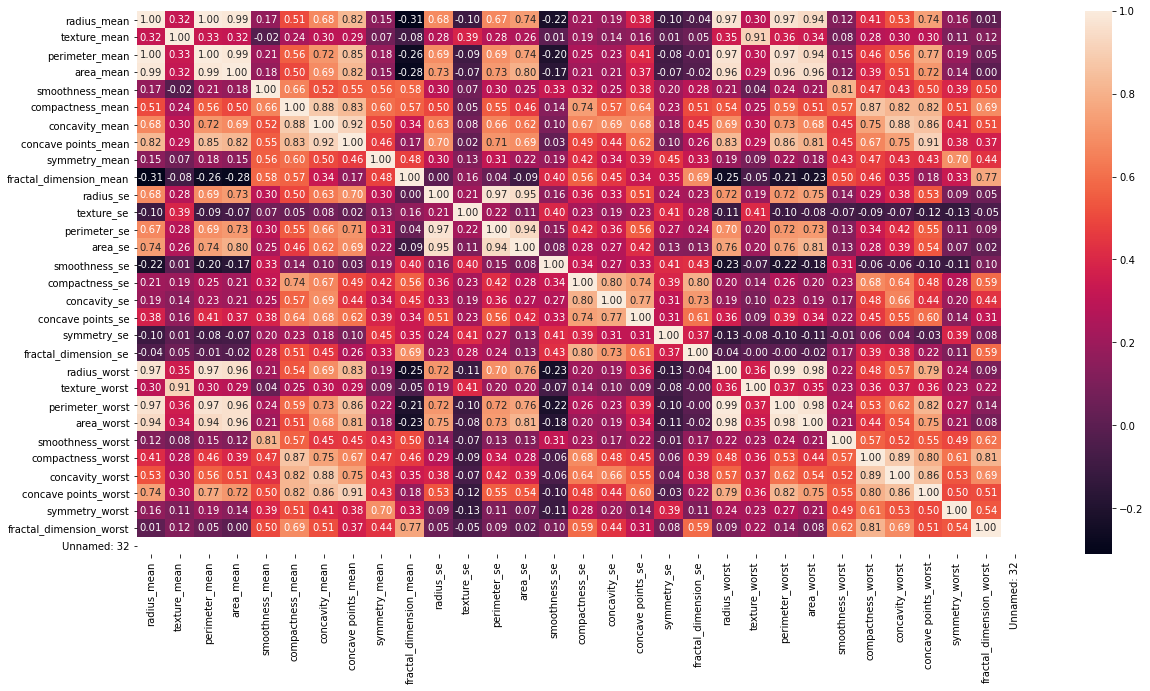

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(dataset.drop('id', axis= 1).corr(), annot = True, fmt = ".2f")

<AxesSubplot:xlabel='radius_mean', ylabel='count'>

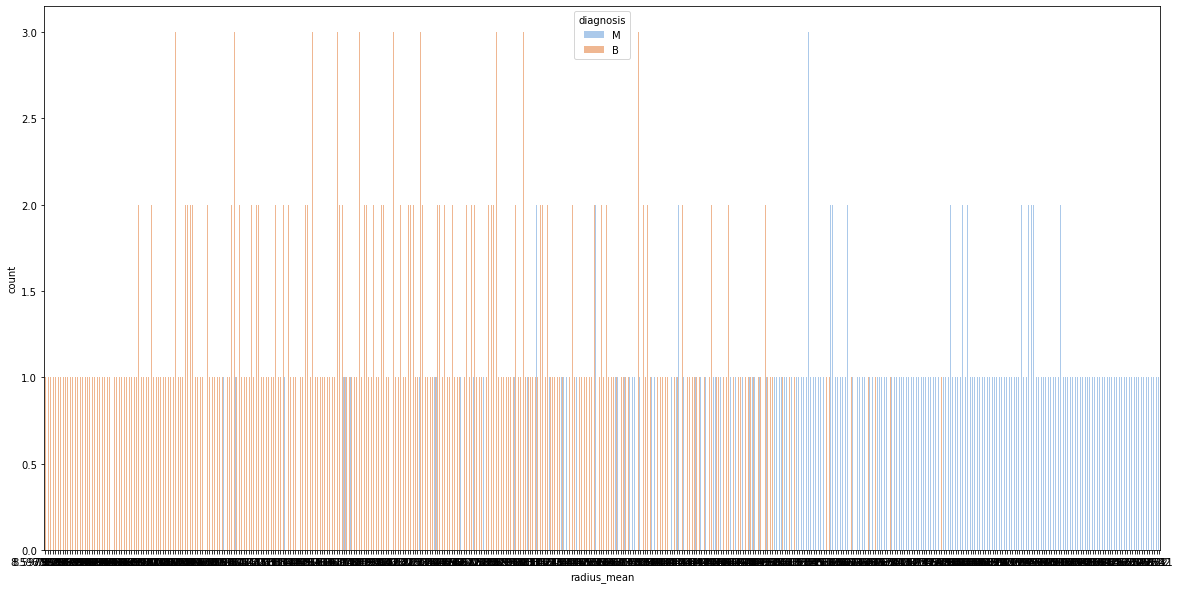

In [18]:
 plt.figure(figsize=(20,10))
sns.countplot(data=dataset, x='radius_mean', palette="pastel", hue= 'diagnosis')

In [9]:
X = dataset.iloc[:, 2:].values 
y = dataset.iloc[:, 1].values

In [18]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Select Features With RFE (Recursive Feature Elimination)

In [12]:
# report which features were selected by RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
# fit RFE
rfe.fit(X, y)
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [13]:
dataset.nunique()  #Columns that have a single observation or value are probably useless for modeling shoeld be removed

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [14]:
print(" the number of rows and columns", dataset.shape)
#The rows of duplicated data are identified and removed from the DataFrame.
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

 the number of rows and columns (569, 33)
(569, 33)


## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (381, 31) (381,)
Test (188, 31) (188,)


## Training the Logistic Regression model on the Training set

In [16]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Predicting the Test set results

In [ ]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

## Computing the accuracy with k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_train = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)  # 10 is the number of fold -- K-fold
print("Accuracy_Train: {:.2f} %".format(accuracies_train.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_train.std()*100))

In [ ]:
accuracies_test = cross_val_score(estimator = model, X = X_test, y = y_test, cv = 10)
print("Accuracy_Test: {:.2f} %".format(accuracies_test.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_test.std()*100))

### Model evaluation
- Model is evaluated using 10-fold cross-validation.
- The evaluation procedure is repeated three times.
- The random seed for the cross-validation split is the repeat number (1, 2, or 3).

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = SVC(kernel='sigmoid', gamma='scale', C=0.1)
steps = [('i',SimpleImputer(strategy='median')), ('p',PowerTransformer()), ('m',model)]
pipeline = Pipeline(steps=steps)
m_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (np.mean(m_scores)*100, np.std(m_scores)*100))

### Model Built Using Chi-Squared Features:
We can use the chi-squared test to score the features and select the four most relevant features.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4) 
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

### Model Built Using Mutual Information Features:
We can repeat the experiment and select the top four features using a mutual information statistic.

In [ ]:
# evaluation of a model fit using mutual information input features
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_mic = fs.transform(X_train)
	X_test_mic = fs.transform(X_test)
	return X_train_fs, X_test_fs
X_train_mic, X_test_mic = select_features(X_train, y_train, X_test)
# fit the model
model.fit(X_train_mic, y_train)
# evaluate the model
y_pred_mic = model.predict(X_test_mic)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_mic)
print('Accuracy_mic: %.2f' % (accuracy*100))

### Evaluate the model using Grid Search Technique;

In [ ]:
# get modeling pipelines to evaluate using Grid Search Technique,
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import RFE
from matplotlib import pyplot

def get_pipelines(model):
	pipelines = list()
	# standardize
	p = Pipeline([('s',StandardScaler()), ('r', RFE(estimator=LogisticRegression(solver='liblinear'), n_features_to_select=10)), ('m',model)])
	pipelines.append(('std', p))
	# scale and power
	p = Pipeline([('s',MinMaxScaler((1,2))), ('p', PowerTransformer()), ('m',model)])
	pipelines.append(('power', p))
	# quantile
	p = Pipeline([('s',QuantileTransformer(n_quantiles=100, output_distribution='normal')), ('m',model)])
	pipelines.append(('quan', p))
	# discretize
	p = Pipeline([('s',KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')), ('m',model)])
	pipelines.append(('kbins', p))
	# pca
	p = Pipeline([('s',PCA(n_components=7)), ('m',model)])
	pipelines.append(('pca', p))
	# svd
	p = Pipeline([('s',TruncatedSVD(n_components=7)), ('m',model)])
	pipelines.append(('svd', p))
	return pipelines

# evaluate a model
def evaluate_model(X, y, model):
	# define the cross-validation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# get the modeling pipelines
pipelines = get_pipelines(model)
# evaluate each pipeline
results, names = list(), list()
for name, pipeline in pipelines:
	# evaluate
	scores = evaluate_model(X, y, pipeline)
	# summarize
	print('>%s: %.3f  (%.3f)' % (name, np.mean(scores)*100, np.std(scores)*100))
	# store
	results.append(scores)
	names.append(name)
# plot the result
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In this case, we can see that the standardization with feature selection (RFE) offers an additional lift in accuracy from 95.58 percent to 96.682 percent, although the data scaling and power transform offers an additional lift in accuracy to 97.368 percent 